# Importing the Libraries and Reading the Dataset

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

red_WineDF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIConcept/winequality-white.csv', sep=';')
white_WineDF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIConcept/winequality-red.csv', sep=';')

In [51]:
red_WineDF.shape

(4898, 12)

In [52]:
red_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
white_WineDF.shape
white_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preprocessing

## Discretizing the quality attribute

In [168]:
# Discretize the 'quality' attribute
red_WineDF['discrete_quality'] = red_WineDF['quality'].apply(lambda x: 1 if x >= 7 else 0)
white_WineDF['discrete_quality'] = white_WineDF['quality'].apply(lambda x: 1 if x >= 7 else 0)

white_WineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,discrete_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Combining the two dataset

In [169]:
# Combine both the dataset
red_WineDF['type'] = 'red'
white_WineDF['type'] = 'white'

wineDF = pd.concat([red_WineDF, white_WineDF], axis=0)
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,discrete_quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,red
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,red
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,red
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,red
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,white
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,white
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,white
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,white


# Balance the Data using UnderSampling

In [153]:
print("Before Balancing the dataset")
print(red_WineDF['discrete_quality'].value_counts())
print(white_WineDF['discrete_quality'].value_counts())
print(wineDF['discrete_quality'].value_counts())

# Balance all the dataset
def BalanceDataset(data):
    # Separate the good and bad wine
    good_wine = data[data['discrete_quality']==1]
    bad_wine = data[data['discrete_quality']==0]

    # Balance the dataset
    bad_wine = bad_wine.sample(good_wine.shape[0], random_state=42, replace=True)
    data = pd.concat([good_wine, bad_wine], axis=0)

    return data

Red_WineDF = BalanceDataset(red_WineDF)
White_WineDF = BalanceDataset(white_WineDF)
WineDF = BalanceDataset(wineDF)
Red_WineDF['discrete_quality'].value_counts()

red_WineDF = BalanceDataset(red_WineDF)
white_WineDF = BalanceDataset(white_WineDF)
wineDF = BalanceDataset(wineDF)

# Check the balanced class distribution
print()
print("After Balancing the dataset")
print(red_WineDF['discrete_quality'].value_counts())
print(white_WineDF['discrete_quality'].value_counts())
print(wineDF['discrete_quality'].value_counts())


Before Balancing the dataset
0    3838
1    1060
Name: discrete_quality, dtype: int64
0    1382
1     217
Name: discrete_quality, dtype: int64
0    5220
1    1277
Name: discrete_quality, dtype: int64

After Balancing the dataset
1    1060
0    1060
Name: discrete_quality, dtype: int64
1    217
0    217
Name: discrete_quality, dtype: int64
1    1277
0    1277
Name: discrete_quality, dtype: int64


In [154]:
from sklearn.model_selection import train_test_split

def splitTrainTest(data):
    train, test = train_test_split(data, test_size=0.2, random_state=42)
    return train, test

def PearsonCorrelation(data):
    X = data.drop(['quality', 'discrete_quality', 'type'], axis=1)
    y = data['discrete_quality']

    from scipy.stats import pearsonr
    corr = []
    for col in X.columns:
        corr.append(pearsonr(X[col], y)[0])
    corr = pd.Series(corr, index=X.columns)
    corr.sort_values(ascending=False, inplace=True)

    return corr

def plotCorrelationMatrix(corr):
    plt.figure(figsize=(6, 6))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title(f'Pearson Correlation')
    plt.xlabel('Correlation')
    plt.ylabel('Features')
    plt.show()

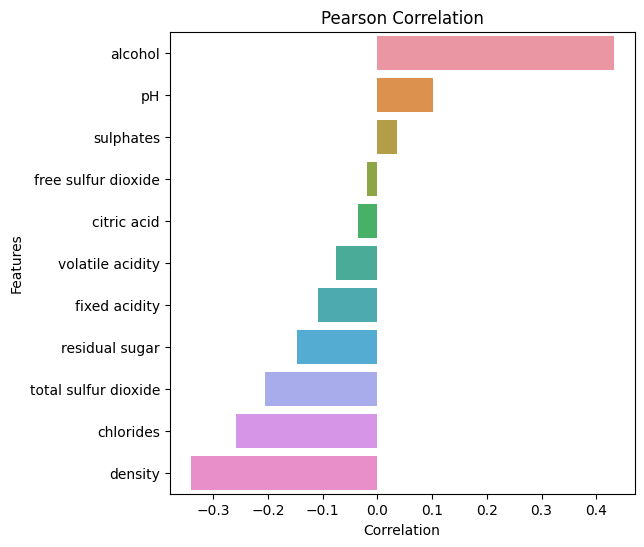

In [155]:
redWine_corr = PearsonCorrelation(red_WineDF)
plotCorrelationMatrix(redWine_corr)

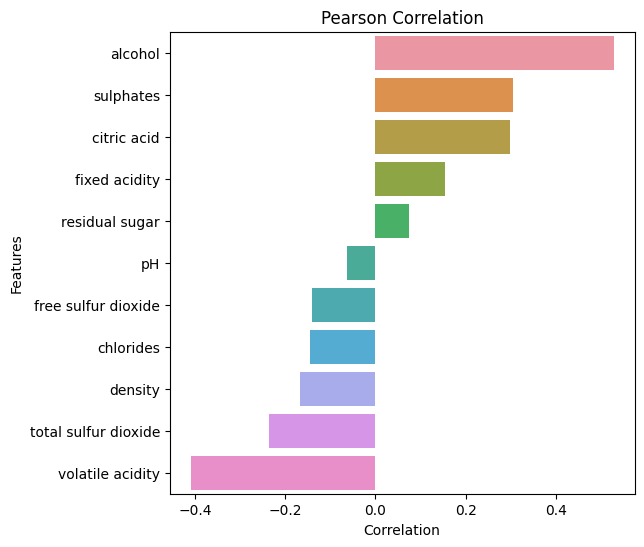

In [156]:
whiteWine_Corr = PearsonCorrelation(white_WineDF)
plotCorrelationMatrix(whiteWine_Corr)

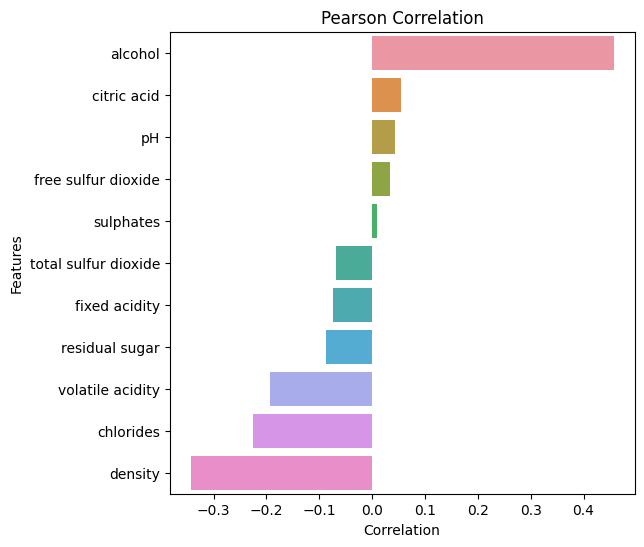

In [157]:
Wine_Corr = PearsonCorrelation(wineDF)
plotCorrelationMatrix(Wine_Corr)

## Model Building

In [159]:
from sklearn.preprocessing import StandardScaler

def splittingTheData(data):
    # Split the data into train and test
    train, test = splitTrainTest(data)
    Corr = PearsonCorrelation(data)

    X_train = train.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_train = X_train[Corr[Corr>0].index]
    y_train = train['discrete_quality']

    X_test = test.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_test = X_test[Corr[Corr>0].index]
    y_test = test['discrete_quality']

    # Normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

In [160]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

def BuildNNModel(X_train, y_train, X_test, y_test, epochs=100, batch_size=32, Optimizer='adam', Loss='binary_crossentropy'):
    inputtensor = Input(shape=(X_train.shape[1],))
    hidden1 = Dense(64, activation='relu')(inputtensor)
    hidden2 = Dense(32, activation='relu')(hidden1)
    hidden3 = Dense(16, activation='relu')(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)

    model = Model(inputs=inputtensor, outputs=output)
    model.compile(optimizer=Optimizer,
                  loss=Loss,
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           ])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    Evaluation_Metrics = model.evaluate(X_test, y_test)

    return model, history, Evaluation_Metrics

In [161]:
def PlotLoss(history):
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
    plt.title(f'Loss vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.show()

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
    plt.title(f'Accuracy vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

    pd.DataFrame(history.history)[['precision', 'val_precision']].plot(figsize=(8, 5))
    plt.title(f'Precision vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Precision')

    plt.show()


    pd.DataFrame(history.history)[['recall', 'val_recall']].plot(figsize=(8, 5))
    plt.title(f'recall vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Recall')

    plt.show()

In [162]:
def printEvaluation(Evaluation_Metrics):
    print(f'Accuracy: {Evaluation_Metrics[1]}')
    print(f'Precision: {Evaluation_Metrics[2]}')
    print(f'Recall: {Evaluation_Metrics[3]}')

## Pipeline for Neural Network Model

In [163]:
def pipeline(data):
    # Preprocess the data
    X_train, y_train, X_test, y_test = splittingTheData(data)
    # Build the model
    model, history, Evaluation_Metrics = BuildNNModel(X_train, y_train, X_test, y_test)
    # Visualize the model
    print(pd.DataFrame(history.history))
    PlotLoss(history)
    # Evaluate the model
    printEvaluation(Evaluation_Metrics)
    print('f1 score: ', 2*Evaluation_Metrics[2]*Evaluation_Metrics[3]/(Evaluation_Metrics[2]+Evaluation_Metrics[3]))

    return model

Epoch 1/100
53/53 [==============================] - 1s 7ms/step - loss: 0.6309 - accuracy: 0.6928 - precision: 0.7025 - recall: 0.6702 - val_loss: 0.5738 - val_accuracy: 0.7193 - val_precision: 0.6983 - val_recall: 0.7678
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7246 - precision: 0.7279 - recall: 0.7185 - val_loss: 0.5562 - val_accuracy: 0.7358 - val_precision: 0.7565 - val_recall: 0.6919
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7193 - precision: 0.7277 - recall: 0.7020 - val_loss: 0.5495 - val_accuracy: 0.7406 - val_precision: 0.7440 - val_recall: 0.7299
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7211 - precision: 0.7249 - recall: 0.7138 - val_loss: 0.5478 - val_accuracy: 0.7524 - val_precision: 0.7500 - val_recall: 0.7536
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7199 - precisi

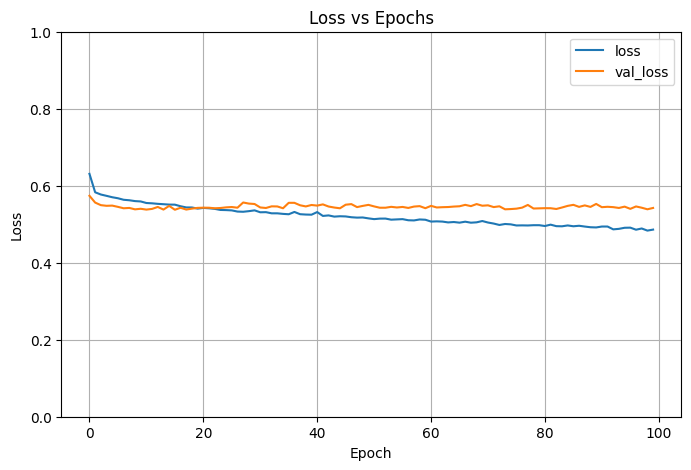

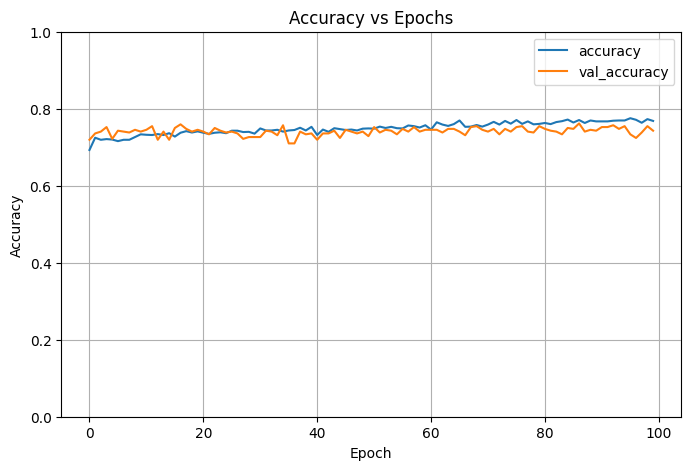

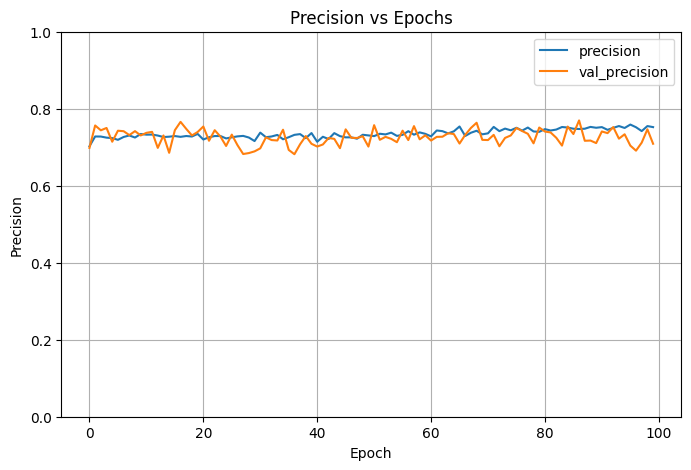

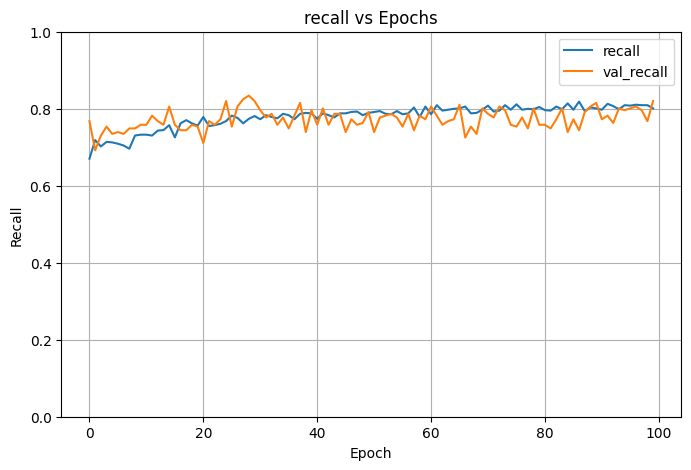

Accuracy: 0.7429245114326477
Precision: 0.7090163826942444
Recall: 0.8199052214622498
f1 score:  0.7604395577809959


In [164]:
pipeline(red_WineDF)

Epoch 1/100
11/11 [==============================] - 1s 32ms/step - loss: 0.6994 - accuracy: 0.5130 - precision: 0.5083 - recall: 0.7110 - val_loss: 0.6747 - val_accuracy: 0.6552 - val_precision: 0.6207 - val_recall: 0.8182
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.7262 - precision: 0.6726 - recall: 0.8786 - val_loss: 0.6430 - val_accuracy: 0.7126 - val_precision: 0.6610 - val_recall: 0.8864
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6204 - accuracy: 0.7406 - precision: 0.6878 - recall: 0.8786 - val_loss: 0.6080 - val_accuracy: 0.7471 - val_precision: 0.6964 - val_recall: 0.8864
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.5791 - accuracy: 0.7666 - precision: 0.7170 - recall: 0.8786 - val_loss: 0.5790 - val_accuracy: 0.7471 - val_precision: 0.6964 - val_recall: 0.8864
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.5390 - accuracy: 0.7695 - precis

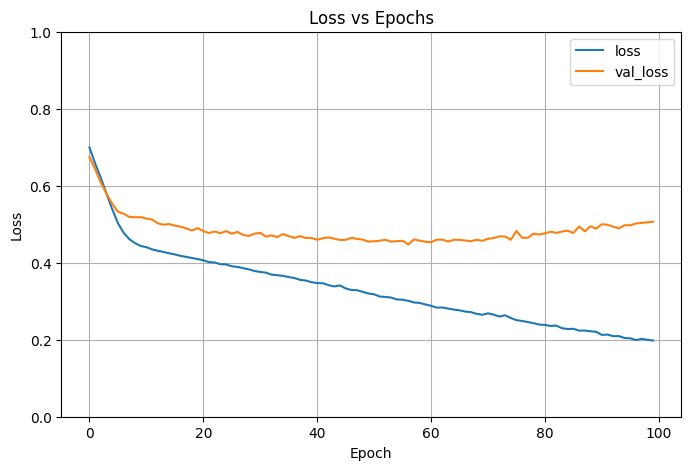

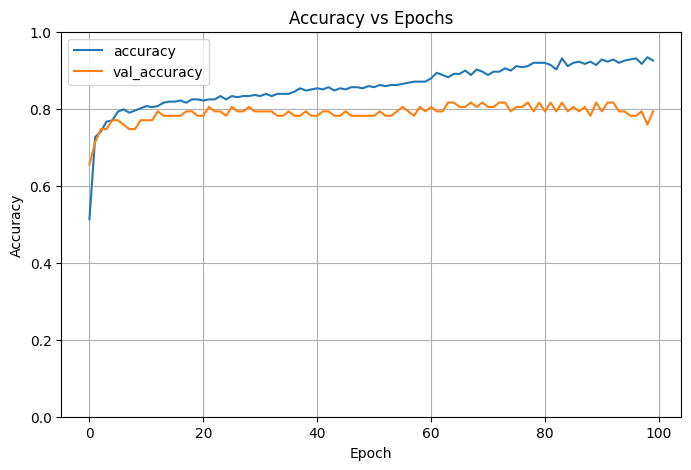

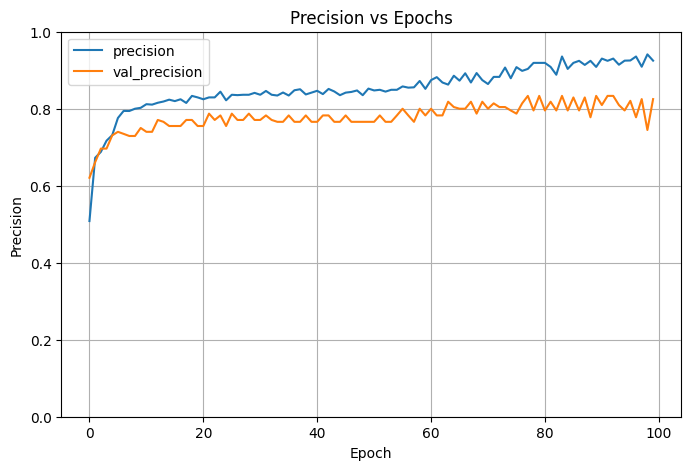

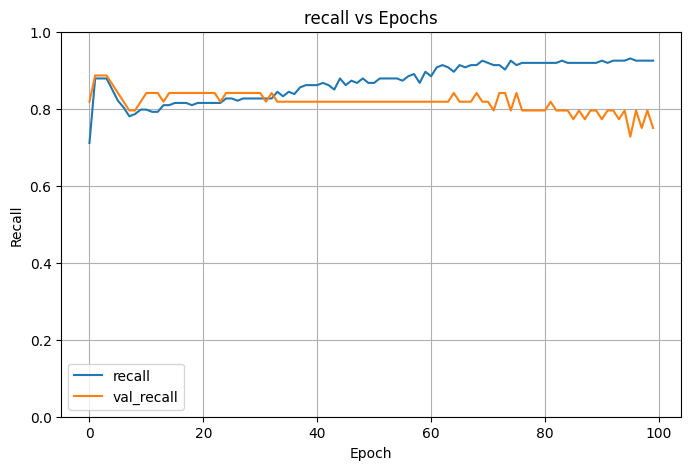

Accuracy: 0.7931034564971924
Precision: 0.824999988079071
Recall: 0.75
f1 score:  0.7857142803079686


In [165]:
pipeline(white_WineDF)

Epoch 1/100
64/64 [==============================] - 2s 7ms/step - loss: 0.6223 - accuracy: 0.6691 - precision: 0.7234 - recall: 0.5375 - val_loss: 0.5700 - val_accuracy: 0.7358 - val_precision: 0.7600 - val_recall: 0.7170
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7283 - precision: 0.7269 - recall: 0.7233 - val_loss: 0.5560 - val_accuracy: 0.7436 - val_precision: 0.8073 - val_recall: 0.6642
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7372 - precision: 0.7431 - recall: 0.7174 - val_loss: 0.5352 - val_accuracy: 0.7456 - val_precision: 0.7848 - val_recall: 0.7019
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7372 - precision: 0.7406 - recall: 0.7223 - val_loss: 0.5371 - val_accuracy: 0.7417 - val_precision: 0.7714 - val_recall: 0.7132
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7391 - precisi

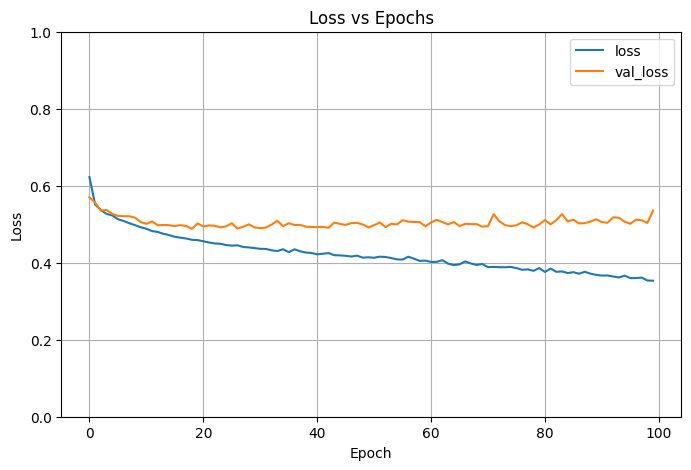

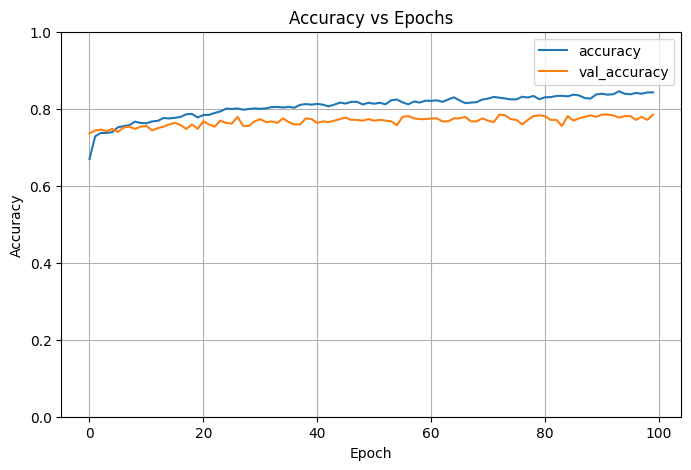

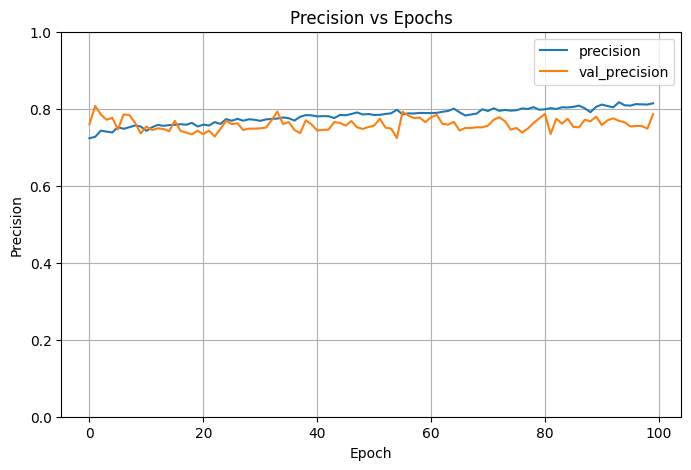

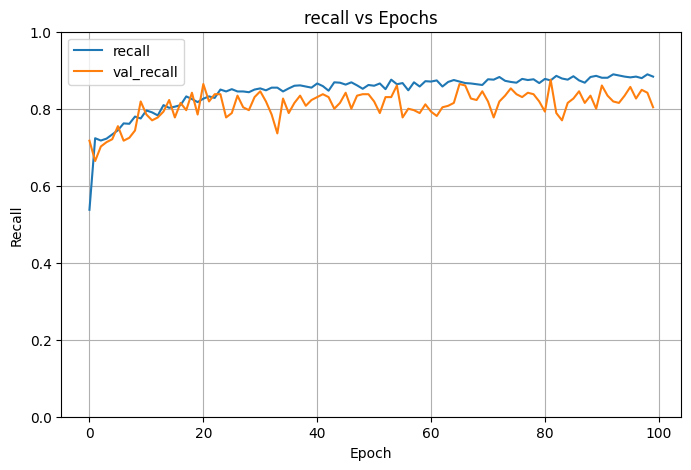

Accuracy: 0.7847357988357544
Precision: 0.785977840423584
Recall: 0.8037735819816589
f1 score:  0.7947761080781522


In [166]:
pipeline(wineDF)

# Balance the Data using OverSampling

In [170]:
print("Before Balancing the dataset")
print(red_WineDF['discrete_quality'].value_counts())
print(white_WineDF['discrete_quality'].value_counts())
print(wineDF['discrete_quality'].value_counts())

def BalanceDataset(data):
    # Separate the good and bad wine
    good_wine = data[data['discrete_quality']==1]
    bad_wine = data[data['discrete_quality']==0]

    # Balance the dataset
    good_wine = good_wine.sample(bad_wine.shape[0], random_state=42, replace=True)
    data = pd.concat([good_wine, bad_wine], axis=0)

    return data

red_WineDF = BalanceDataset(red_WineDF)
white_WineDF = BalanceDataset(white_WineDF)
wineDF = BalanceDataset(wineDF)

# Check the balanced class distribution
print()
print("After Balancing the dataset")
print(red_WineDF['discrete_quality'].value_counts())
print(white_WineDF['discrete_quality'].value_counts())
print(wineDF['discrete_quality'].value_counts())

Before Balancing the dataset
0    3838
1    1060
Name: discrete_quality, dtype: int64
0    1382
1     217
Name: discrete_quality, dtype: int64
0    5220
1    1277
Name: discrete_quality, dtype: int64

After Balancing the dataset
1    3838
0    3838
Name: discrete_quality, dtype: int64
1    1382
0    1382
Name: discrete_quality, dtype: int64
1    5220
0    5220
Name: discrete_quality, dtype: int64


In [171]:
from sklearn.model_selection import train_test_split

def splitTrainTest(data):
    train, test = train_test_split(data, test_size=0.2, random_state=42)
    return train, test

def PearsonCorrelation(data):
    X = data.drop(['quality', 'discrete_quality', 'type'], axis=1)
    y = data['discrete_quality']

    from scipy.stats import pearsonr
    corr = []
    for col in X.columns:
        corr.append(pearsonr(X[col], y)[0])
    corr = pd.Series(corr, index=X.columns)
    corr.sort_values(ascending=False, inplace=True)

    return corr

def plotCorrelationMatrix(corr):
    plt.figure(figsize=(6, 6))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title(f'Pearson Correlation')
    plt.xlabel('Correlation')
    plt.ylabel('Features')
    plt.show()

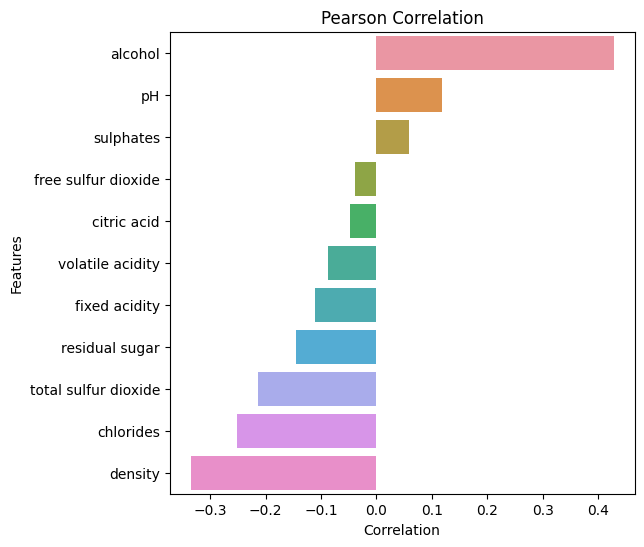

In [172]:
redWine_corr = PearsonCorrelation(red_WineDF)
plotCorrelationMatrix(redWine_corr)

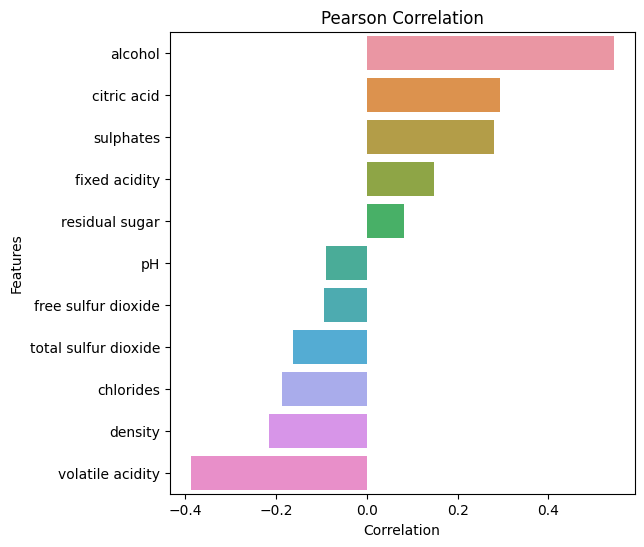

In [173]:
whiteWine_Corr = PearsonCorrelation(white_WineDF)
plotCorrelationMatrix(whiteWine_Corr)

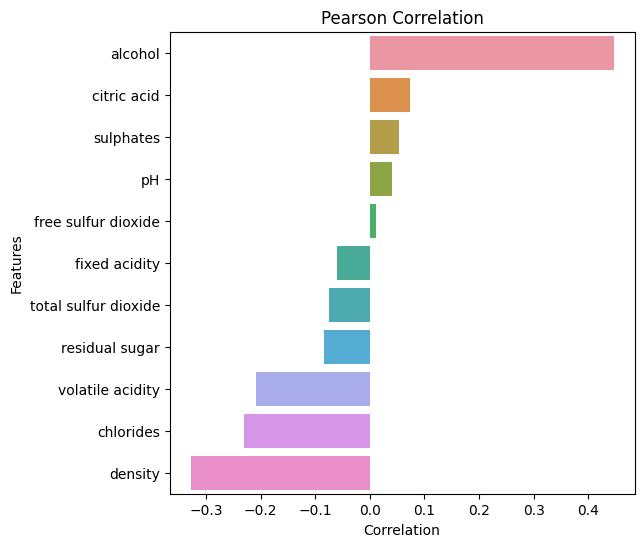

In [174]:
wine_Corr = PearsonCorrelation(wineDF)
plotCorrelationMatrix(wine_Corr)

## Model Building

In [175]:
from sklearn.preprocessing import StandardScaler

def splittingTheData(data):
    # Split the data into train and test
    train, test = splitTrainTest(data)
    Corr = PearsonCorrelation(data)

    X_train = train.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_train = X_train[Corr[Corr>0].index]
    y_train = train['discrete_quality']

    X_test = test.drop(['quality', 'discrete_quality', 'type'], axis=1)
    X_test = X_test[Corr[Corr>0].index]
    y_test = test['discrete_quality']

    # Normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

In [176]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

def BuildNNModel(X_train, y_train, X_test, y_test, epochs=100, batch_size=32, Optimizer='adam', Loss='binary_crossentropy'):
    inputtensor = Input(shape=(X_train.shape[1],))
    hidden1 = Dense(64, activation='relu')(inputtensor)
    hidden2 = Dense(32, activation='relu')(hidden1)
    hidden3 = Dense(16, activation='relu')(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)

    model = Model(inputs=inputtensor, outputs=output)
    model.compile(optimizer=Optimizer,
                  loss=Loss,
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           ])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    Evaluation_Metrics = model.evaluate(X_test, y_test)

    return model, history, Evaluation_Metrics

In [177]:
def PlotLoss(history):
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
    plt.title(f'Loss vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.show()

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
    plt.title(f'Accuracy vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

    pd.DataFrame(history.history)[['precision', 'val_precision']].plot(figsize=(8, 5))
    plt.title(f'Precision vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Precision')

    plt.show()


    pd.DataFrame(history.history)[['recall', 'val_recall']].plot(figsize=(8, 5))
    plt.title(f'recall vs Epochs')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Recall')

    plt.show()

In [178]:
def printEvaluation(Evaluation_Metrics):
    print(f'Accuracy: {Evaluation_Metrics[1]}')
    print(f'Precision: {Evaluation_Metrics[2]}')
    print(f'Recall: {Evaluation_Metrics[3]}')

## Pipeline for Neural Network Model

In [179]:
def pipeline(data):
    # Preprocess the data
    X_train, y_train, X_test, y_test = splittingTheData(data)
    # Build the model
    model, history, Evaluation_Metrics = BuildNNModel(X_train, y_train, X_test, y_test)
    # Visualize the model
    print(pd.DataFrame(history.history))
    PlotLoss(history)
    # Evaluate the model
    printEvaluation(Evaluation_Metrics)
    print('f1 score: ', 2*Evaluation_Metrics[2]*Evaluation_Metrics[3]/(Evaluation_Metrics[2]+Evaluation_Metrics[3]))

    return model

Epoch 1/100
192/192 [==============================] - 2s 4ms/step - loss: 0.6003 - accuracy: 0.6992 - precision: 0.7050 - recall: 0.6817 - val_loss: 0.5807 - val_accuracy: 0.7109 - val_precision: 0.7158 - val_recall: 0.7121
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7171 - precision: 0.7125 - recall: 0.7248 - val_loss: 0.5728 - val_accuracy: 0.7135 - val_precision: 0.7139 - val_recall: 0.7249
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7158 - precision: 0.7095 - recall: 0.7278 - val_loss: 0.5667 - val_accuracy: 0.7122 - val_precision: 0.7154 - val_recall: 0.7172
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7212 - precision: 0.7119 - recall: 0.7399 - val_loss: 0.5650 - val_accuracy: 0.7103 - val_precision: 0.7094 - val_recall: 0.7249
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7254

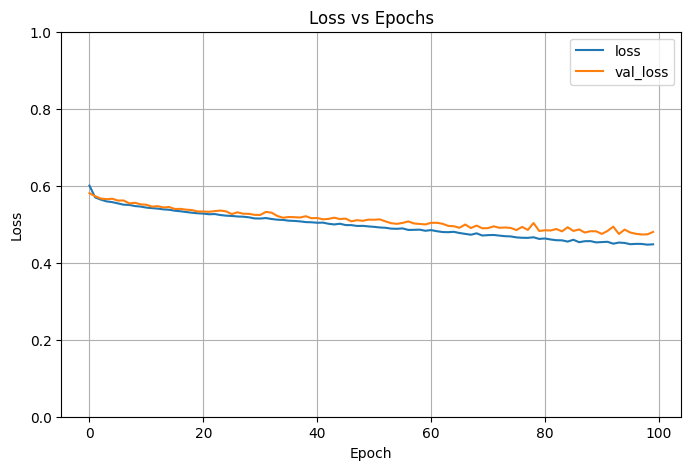

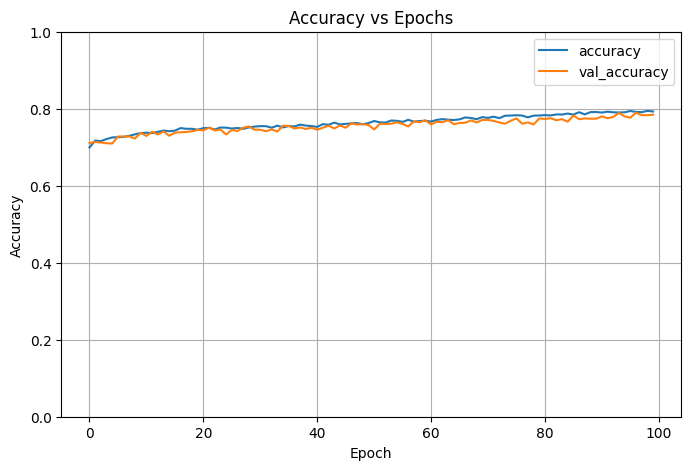

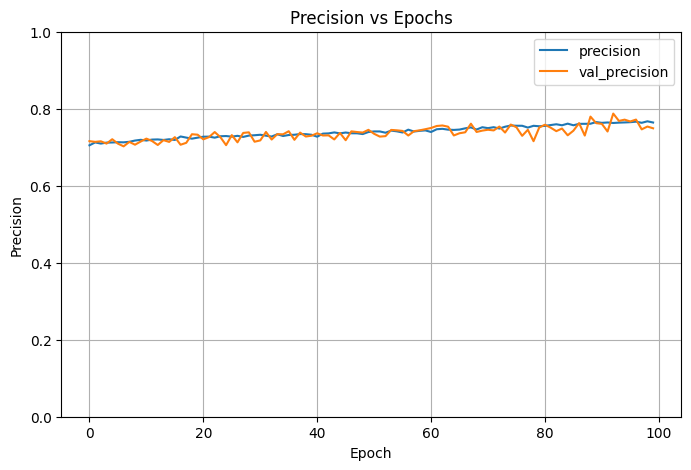

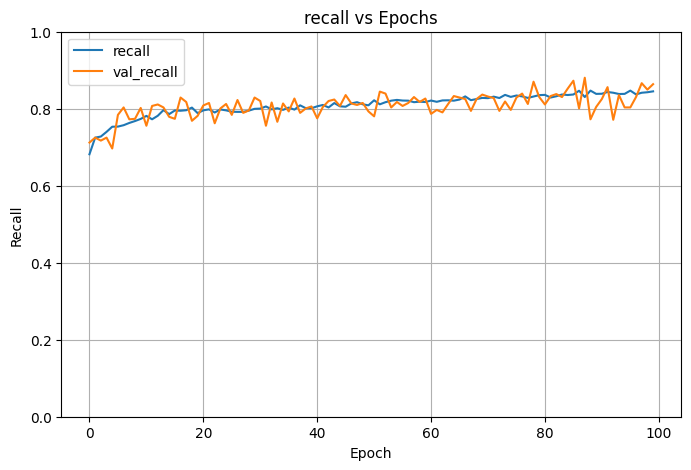

Accuracy: 0.7845051884651184
Precision: 0.7491638660430908
Recall: 0.8637531995773315
f1 score:  0.8023880459762305


In [180]:
pipeline(red_WineDF)

Epoch 1/100
70/70 [==============================] - 2s 7ms/step - loss: 0.5525 - accuracy: 0.7761 - precision: 0.7666 - recall: 0.7896 - val_loss: 0.4461 - val_accuracy: 0.8065 - val_precision: 0.8041 - val_recall: 0.8239
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7847 - precision: 0.7772 - recall: 0.7942 - val_loss: 0.4235 - val_accuracy: 0.8101 - val_precision: 0.8255 - val_recall: 0.7993
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7947 - precision: 0.7855 - recall: 0.8069 - val_loss: 0.4028 - val_accuracy: 0.8336 - val_precision: 0.8179 - val_recall: 0.8697
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8128 - precision: 0.7974 - recall: 0.8352 - val_loss: 0.3944 - val_accuracy: 0.8481 - val_precision: 0.8311 - val_recall: 0.8838
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8128 - precisi

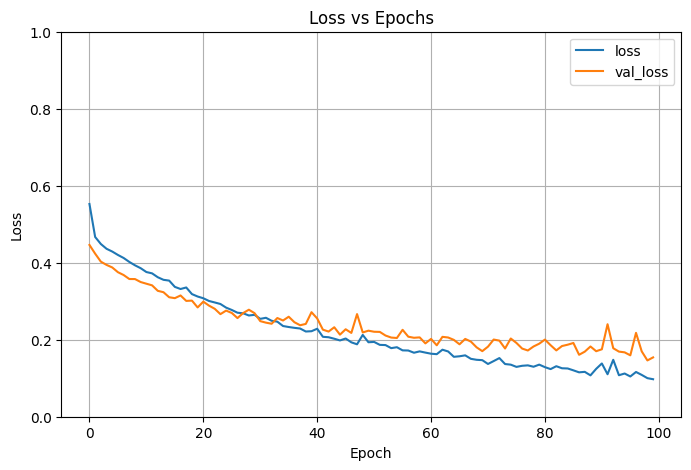

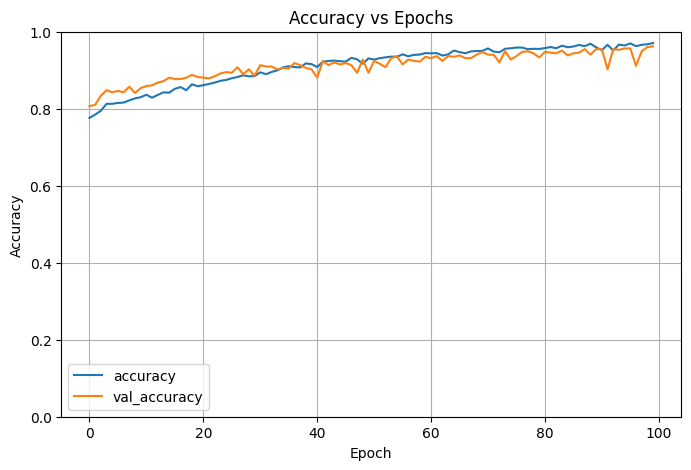

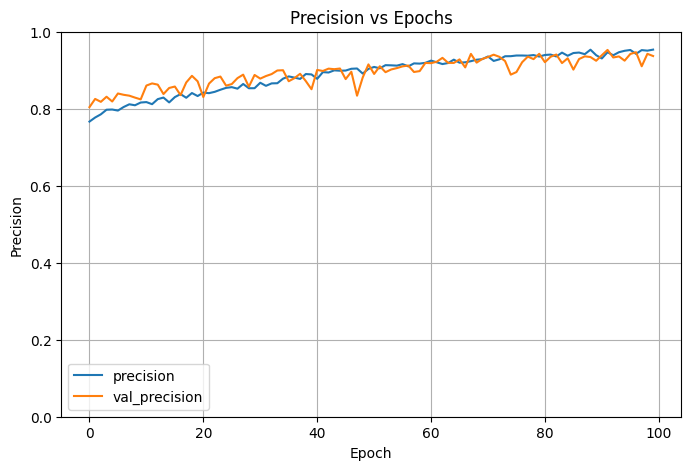

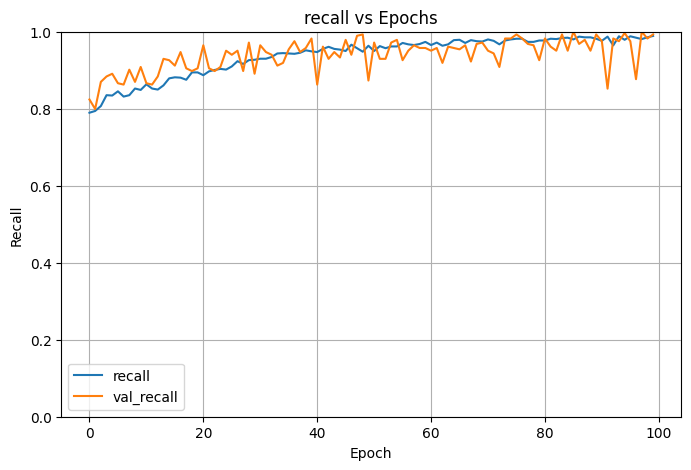

Accuracy: 0.9620253443717957
Precision: 0.9368770718574524
Recall: 0.9929577708244324
f1 score:  0.9641025731666151


In [148]:
pipeline(white_WineDF)

Epoch 1/100
261/261 [==============================] - 2s 3ms/step - loss: 0.5769 - accuracy: 0.7087 - precision: 0.7112 - recall: 0.6987 - val_loss: 0.5556 - val_accuracy: 0.7184 - val_precision: 0.7524 - val_recall: 0.6645
Epoch 2/100
261/261 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7375 - precision: 0.7419 - recall: 0.7252 - val_loss: 0.5334 - val_accuracy: 0.7208 - val_precision: 0.7366 - val_recall: 0.7012
Epoch 3/100
261/261 [==============================] - 1s 2ms/step - loss: 0.5107 - accuracy: 0.7410 - precision: 0.7418 - recall: 0.7362 - val_loss: 0.5233 - val_accuracy: 0.7371 - val_precision: 0.7265 - val_recall: 0.7738
Epoch 4/100
261/261 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.7516 - precision: 0.7455 - recall: 0.7608 - val_loss: 0.5162 - val_accuracy: 0.7390 - val_precision: 0.7350 - val_recall: 0.7606
Epoch 5/100
261/261 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7572

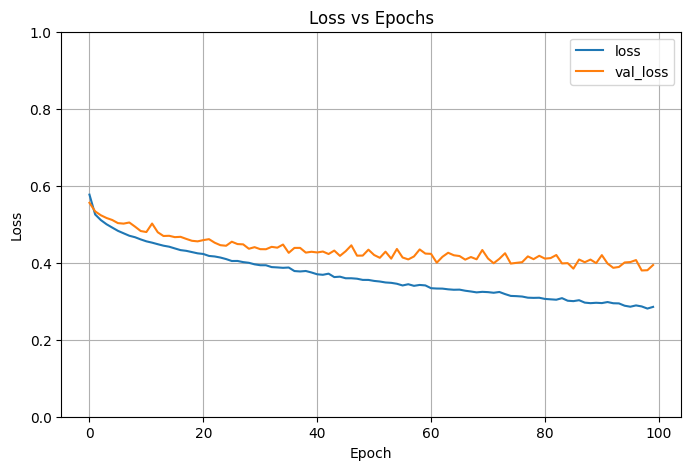

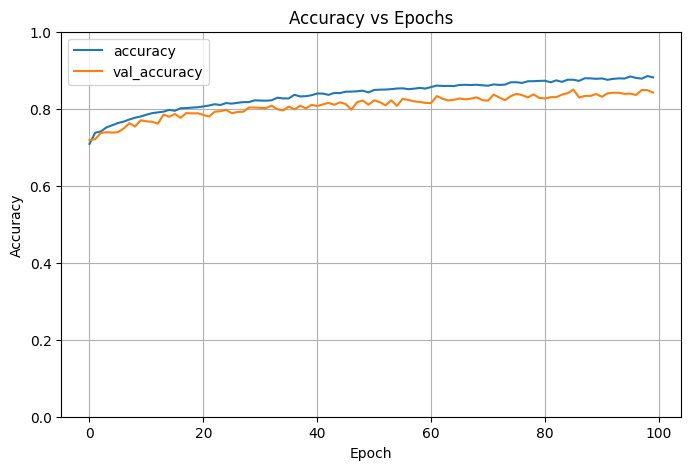

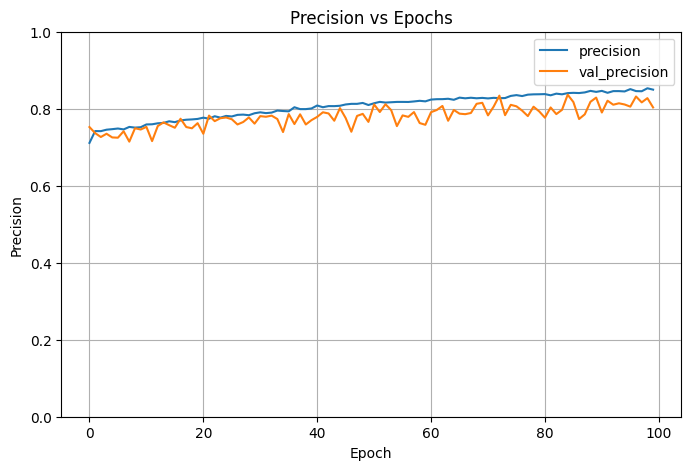

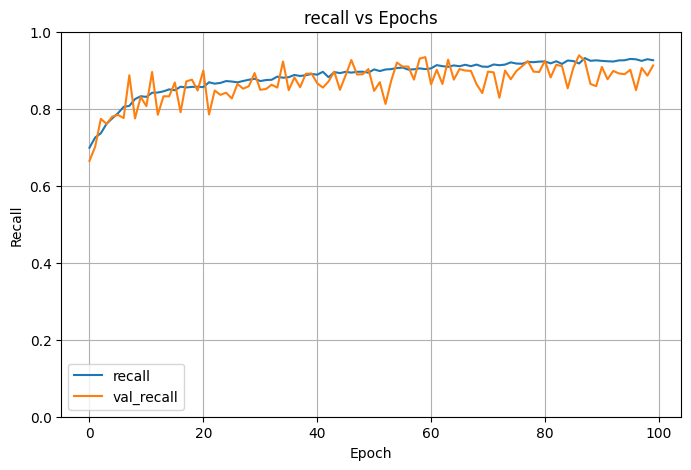

Accuracy: 0.8419540524482727
Precision: 0.80331951379776
Recall: 0.9123468399047852
f1 score:  0.8543689374866681


In [149]:
pipeline(wineDF)

## Conclusion

When we address the issue of dataset imbalance using undersampling, where we adjust the quantity of good wine samples to match that of bad wines, we notice that the resulting accuracy tends to hover around 70-80%. This outcome isn't ideal since the model struggles to effectively predict the presence of good wines. Conversely, if we opt for oversampling, a method where we create additional instances of good wine samples to equal the quantity of bad wine samples, the evaluation metrics exhibit significant improvement, ranging from 80% to 90%. Consequently, oversampling proves to be a more effective strategy for balancing the dataset.

Moreover, it's recommended to normalize the features to fall within the range of 0 to 1. The architecture of the neural network involves three hidden layers containing 64, 32, and 16 neurons, respectively. The model employs a batch size of 32 during training, with 100 epochs, and utilizes the Adam optimizer in conjunction with the binary cross-entropy loss function. Although the performance evaluation for Red Wine Prediction remains consistent, we manage to achieve accuracy, precision, recall, and f1 score all surpassing 80% for both the Red and Combined Wine Datasets. This indicates that these models are suitable for effectively distinguishing between good and bad wines.

